# WordCloud

In [1]:
!pip install konlpy
import re
import konlpy
import pandas as pd

In [2]:
#'과제_뉴스 기사' 텍스트 불러오고 string으로 읽기
with open('과제_뉴스 기사.txt', encoding='utf-8') as f:  #본인 디렉토리에 맞게 설정해주세요!
    text = f.readlines()
    

In [3]:
text_strip = [i.strip() for i in text if i != '\n']
text_join = ' '.join(text_strip)
#빈 줄과 양 끝단의 공백 제거
p = re.compile(r'\bclass\b')
filtered_content = re.sub(r'[^\d\s\w]', ' ', text_join)
#원하는 형태소 분석기로 pos 태깅, morphs, 그리고 명사만 모아놓은 변수 만들어보기
okt = konlpy.tag.Okt()
okt_pos = okt.pos(filtered_content)

komoran = konlpy.tag.Komoran()
komoran.morphs(filtered_content)

komoran_nouns = komoran.nouns(filtered_content)

#이메일, 날짜 등 불용어 제거
from nltk.corpus import stopwords
stop_words = ['이오', '에다', '하오', '마오'] #한국어로 할 때는 직접 설정.
unique_Noun_words = set(komoran_nouns)
for word in unique_Noun_words:
    if word in stop_words or len(word) == 1:  #한 글자짜리 단어는 알아보기 어려워서 제거.
        while word in komoran_nouns:
            komoran_nouns.remove(word)

#Counter 모듈로 빈도 분석
from collections import Counter
c = Counter(komoran_nouns)
c

Counter({'대출금': 1,
         '리도': 1,
         '사상': 4,
         '최저': 5,
         '은행': 7,
         '예금': 4,
         '금리': 17,
         '시대': 2,
         '연간': 1,
         '만원': 1,
         '얘기': 2,
         '적금': 1,
         '수단': 1,
         '안전': 1,
         '보관': 1,
         '금고': 1,
         '대출': 15,
         '역대': 5,
         '기록': 2,
         '주식': 3,
         '부동산': 2,
         '한국은행': 1,
         '발표': 1,
         '6월': 3,
         '금융': 1,
         '기관': 1,
         '가중': 1,
         '평균': 4,
         '지난달': 1,
         '전월': 3,
         '대비': 3,
         '포인트': 2,
         '처음': 2,
         '정기예금': 1,
         '상품': 1,
         '수준': 2,
         '코로나': 1,
         '사태': 1,
         '이후': 1,
         '한은': 2,
         '기준': 2,
         '집계': 1,
         '가계': 4,
         '신용': 7,
         '주택': 3,
         '담보': 1,
         '대로': 1,
         '이번': 1,
         '정부': 1,
         '규제': 1,
         '강화': 1,
         '사람': 2,
         '때문': 2,
         '관계자': 1,
         '대책': 1

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

## 한글폰트 다운로드
나눔 폰트를 다운 받고 font_path를 저장해주세요. 이후 plt.rc를 활용해 폰트를 지정해주세요.

In [5]:
import matplotlib.font_manager as fm
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f] 
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 468
['C:\\WINDOWS\\Fonts\\calibrili.ttf', 'C:\\WINDOWS\\Fonts\\Hancom Gothic Bold.ttf', 'C:\\WINDOWS\\Fonts\\GOTHICB.TTF', 'C:\\Windows\\Fonts\\SitkaZ.ttc', 'C:\\Windows\\Fonts\\MTCORSVA.TTF', 'C:\\WINDOWS\\Fonts\\corbelb.ttf', 'C:\\Windows\\Fonts\\BKANT.TTF', 'C:\\WINDOWS\\Fonts\\corbeli.ttf', 'C:\\WINDOWS\\Fonts\\HMKMRHD.TTF', 'C:\\Windows\\Fonts\\msjhbd.ttc', 'C:\\WINDOWS\\Fonts\\palabi.ttf', 'C:\\WINDOWS\\Fonts\\MISTRAL.TTF', 'C:\\Windows\\Fonts\\REFSAN.TTF', 'C:\\Users\\kjm\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothicLight.ttf', 'C:\\Users\\kjm\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquareRoundEB.ttf', 'C:\\WINDOWS\\Fonts\\NirmalaB.ttf', 'C:\\WINDOWS\\Fonts\\REFSPCL.TTF', 'C:\\Windows\\Fonts\\pala.ttf', 'C:\\WINDOWS\\Fonts\\-윤고딕540.ttf', 'C:\\Users\\kjm\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf', 'C:\\WINDOWS\\Fonts\\consolaz.ttf', 'C:\\WINDOWS\\Fonts\\BOOKOS.TTF', 'C:\\WINDOWS\\Fonts\\나눔고딕.ttf', 'C:\\WINDOWS\\Fonts

In [6]:
nanum_font

['C:\\Users\\kjm\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothicLight.ttf',
 'C:\\Users\\kjm\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquareRoundEB.ttf',
 'C:\\Users\\kjm\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf',
 'C:\\Users\\kjm\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquare.ttf',
 'C:\\Users\\kjm\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunpenR.ttf',
 'C:\\Users\\kjm\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothicBold.ttf',
 'C:\\Users\\kjm\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquareRoundR.ttf',
 'C:\\Users\\kjm\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumPen.ttf',
 'C:\\Users\\kjm\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothicUltraLight.ttf',
 'C:\\Users\\kjm\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunpenB.ttf',
 'C:\\Users\\kjm\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquareRoundL.ttf',
 'C:\\Users\\kjm\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSqua

In [7]:
font_path = 'C:\\Users\\kjm\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquare.ttf'

In [8]:
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumSquare_ac


## 워드클라우드 시각화
단어별 빈도분석이 저장된 c 라는 객체를 WordCloud 시각화해주세요.

Hint: 
<br>wordcloud = WordCloud(~~~)
<br>wordcloud.generate_from_frequencies(c)
<br>wordcloud.to_image()
<br>잘 모르시겠으면 Notion에 업로드된 텍스트 마이닝의 워드클라우드 강의를 참고해주세요.

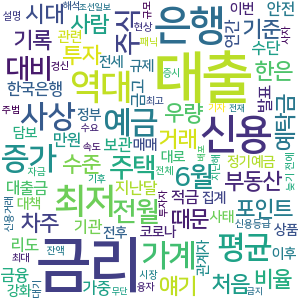

In [9]:
wordcloud = WordCloud(
    max_font_size=60,
    width = 300,
    height = 300,
    relative_scaling='auto',
    background_color='white',
    font_path=font_path)
wordcloud.generate_from_frequencies(c)
wordcloud.to_image()

# Bike Sharing Demand

출처: https://www.kaggle.com/c/bike-sharing-demand/data?select=train.csv

## Load Dataset

첨부된 train 데이터를 불러와주세요.

In [51]:
train = pd.read_csv('train.csv')

## 전처리
datetime의 data를 연/월/일/시간/분/초/요일로 쪼개서 새로운 컬럼에 담아주세요.
전처리 하고 나면 연 컬럼, 월 컬럼부터 초 컬럼, 요일 컬럼까지 총 7개의 컬럼이 추가 되어야합니다.
<br>Hint:파이썬에 내장된 .dt 함수를 활용해주세요.

In [62]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,요일,연,월,일,시간,분,초
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,Saturday,2011,01,01,00,00,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,Saturday,2011,01,01,01,00,00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,Saturday,2011,01,01,02,00,00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,Saturday,2011,01,01,03,00,00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,Saturday,2011,01,01,04,00,00


In [53]:
import datetime as dt

In [54]:
g=[]
for i in range(0,10886):
    x = dt.datetime.strptime(train['datetime'][i], "%Y-%m-%d %H:%M:%S")
    g.append(x.weekday())

train['요일'] = g

In [56]:
train.datetime = pd.to_datetime(train.datetime)

In [58]:
train["연"] = train.datetime.dt.strftime("%Y")
train["월"] = train.datetime.dt.strftime("%m")
train["일"] = train.datetime.dt.strftime("%d")
train["시간"] = train.datetime.dt.strftime("%H")
train["분"] = train.datetime.dt.strftime("%M")
train["초"] = train.datetime.dt.strftime("%S")

datetime의 요일 컬럼을 사람이 알아보기 쉽게 Monday~Sunday로 바꿔주세요.
dt 함수를 사용하셨다면 다음과 같이 바꾸시면 됩니다.
<br> 0 = Monday
<br> 1 = Tuesday
<br> 2 = Wednesday
<br> 3 = Thursday
<br> 4 = Friday
<br> 5 = Saturday
<br> 6 = Sunday

In [60]:
a = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
for i in range(0,7):
    train['요일'] = train['요일'].replace(i, a[i])

## 시각화



### 1)
연도별 자전거 대여량과 월별 자전거 대여량을 시각화 해주세요.

이후 각 시각화한 plot에서 각자 인사이트를 도출해주세요.

<br> 힌트: barchart, 계절

In [16]:
import seaborn as sns

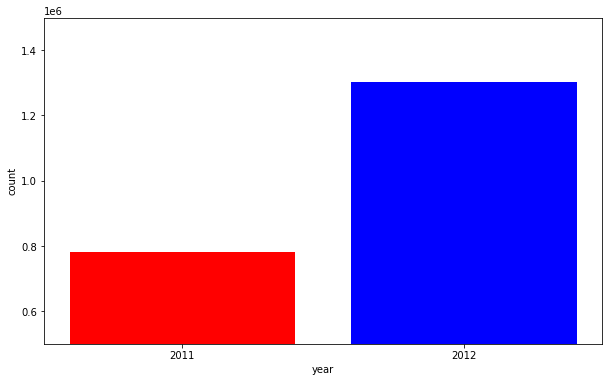

In [63]:
plt.figure(figsize=(10,6))
plt.bar( x=[2011,2012], height=train.groupby('연').sum()['count'], color=['red','blue'])
plt.xlabel('year')
plt.ylabel('count')
plt.xticks([2011,2012], 
           ['2011','2012'])
plt.ylim(500000, 1500000)
plt.show()

* 2012 년에 대여 횟수가 더 많은 것으로 보아 휴일이 더 많았거나 날씨가 더 좋았을 것으로 예상된다.
* weather나 holiday와 연관지어 이어가면 좋을 것 같다.

In [70]:
train['월'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

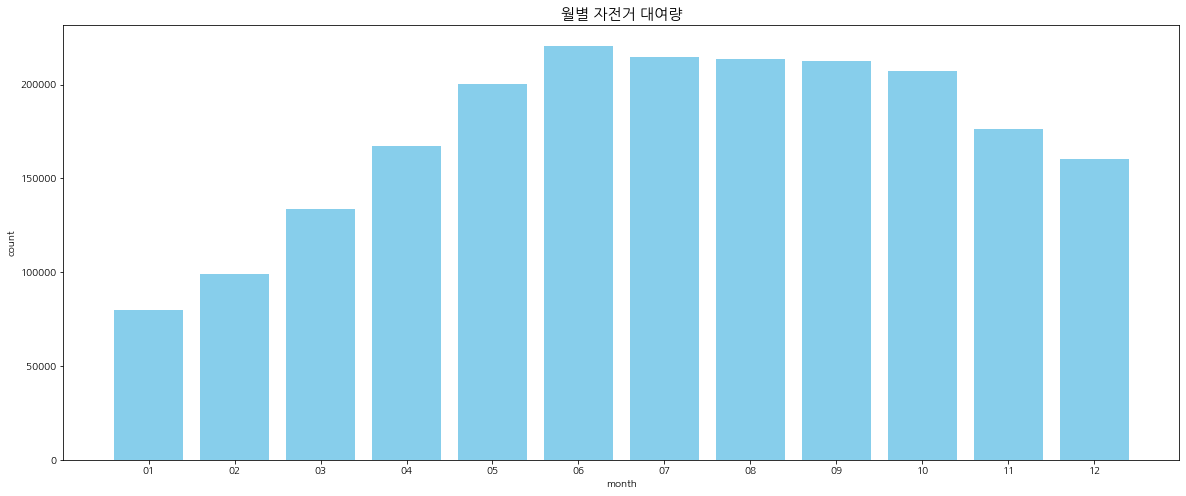

In [77]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(20,8))
plt.bar( x=train['월'].unique(), height=train.groupby('월').sum()['count'], color='skyblue')
plt.xlabel('month')
plt.ylabel('count')
plt.title('월별 자전거 대여량', size=15)
plt.show()

* 날씨가 추워지는 11월 이후 계절에는 대여 횟수가 줄고 따뜻해지는 3월 이후 계절에는 대여 횟수가 늘어나는 경향을 보인다.

###2)
연컬럼과 월컬럼을 합쳐주세요. 이후 2011년 1월부터 2012년 12월까지 월별 자전거 대여량을 시각화 해주세요. 

이전에 시각화한 월별 자전거 대여량 시각화 차트에서, 어째서 1월과 12월의 자전거 대여량의 차이가 크게 났는지 설명해주세요.

In [65]:
train1 = train.copy()

In [66]:
train1['year_month']= train1['연']+'_'+train1['월']

In [161]:
train1.groupby('시간').sum()['count'].sort_index()

시간
00     25088
01     15372
02     10259
03      5091
04      2832
05      8935
06     34698
07     96968
08    165060
09    100910
10     79667
11     95857
12    116968
13    117551
14    111010
15    115960
16    144266
17    213757
18    196472
19    143767
20    104204
21     79057
22     60911
23     40816
Name: count, dtype: int64

In [67]:
train1.year_month.unique()

array(['2011_01', '2011_02', '2011_03', '2011_04', '2011_05', '2011_06',
       '2011_07', '2011_08', '2011_09', '2011_10', '2011_11', '2011_12',
       '2012_01', '2012_02', '2012_03', '2012_04', '2012_05', '2012_06',
       '2012_07', '2012_08', '2012_09', '2012_10', '2012_11', '2012_12'],
      dtype=object)

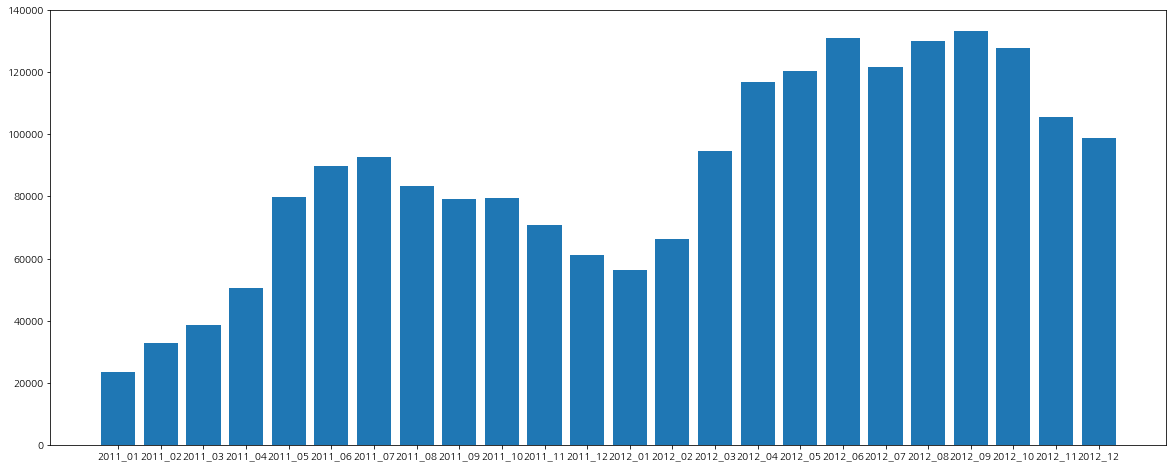

In [90]:
plt.figure(figsize=(20,8))
plt.bar( x=train1.year_month.unique(), height=train1.groupby('year_month').sum()['count'])
plt.show()

* 11년 1월의 대여량이 유독 작은데, 이것을 1월의 평균을 취해서 계산했기 때문

* 

###3)
아래의 정보가 나타나게 시각화 해주세요.
<br>1) 시간별 자전거 대여량
<br>2) 근무일/휴일에 따른 시간별 자전거 대여량
<br>3) 요일에 따른 시간별 자전거 대여량

이 플랏에서 인사이트를 도출해주세요.

Hint: pointplot, hue

In [78]:
train1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,요일,연,월,일,시간,분,초,year_month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,Saturday,2011,01,01,00,00,00,2011_01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,Saturday,2011,01,01,01,00,00,2011_01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,Saturday,2011,01,01,02,00,00,2011_01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,Saturday,2011,01,01,03,00,00,2011_01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,Saturday,2011,01,01,04,00,00,2011_01


In [188]:
tp1 = train1.pivot_table(index='시간', columns=['holiday'], values=['count'], aggfunc='mean')
tp2 = train1.pivot_table(index='시간', columns=['workingday'], values=['count'], aggfunc='mean')

In [189]:
tp1.head()

count           
holiday          0          1
시간                           
00       54.796380  66.769231
01       33.582766  43.230769
02       22.747126  28.000000
03       11.738717  12.416667
04        6.377622   7.384615

In [192]:
tp2.head()

count           
workingday          0          1
시간                              
00          94.489655  36.732258
01          71.910345  16.003236
02          53.748252   8.436066
03          25.534722   4.892734
04           8.544828   5.363636

In [197]:
d0 = train1.groupby(['시간']).agg('sum')['count']
d1 = train1.groupby(['시간']).agg('mean')['count']

In [87]:
traind1['시간'].unique()

array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23'], dtype=object)

In [173]:
d1

시간
00     25088
01     15372
02     10259
03      5091
04      2832
05      8935
06     34698
07     96968
08    165060
09    100910
10     79667
11     95857
12    116968
13    117551
14    111010
15    115960
16    144266
17    213757
18    196472
19    143767
20    104204
21     79057
22     60911
23     40816
Name: count, dtype: int64

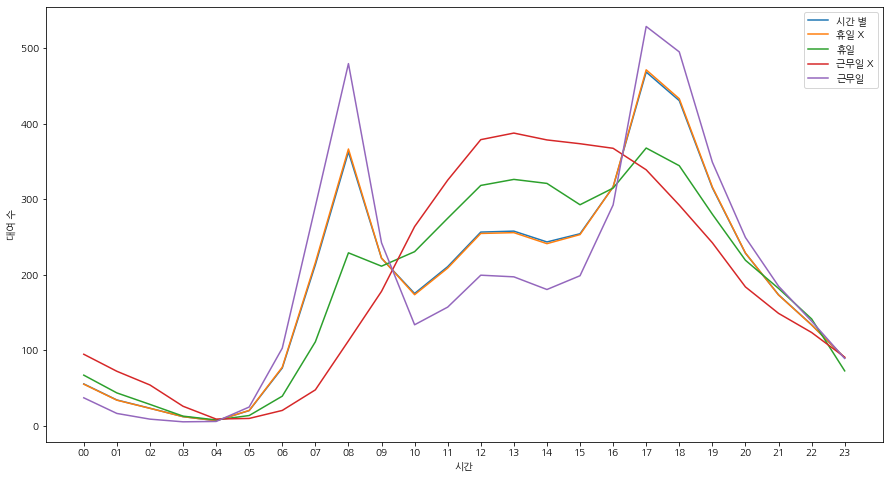

In [199]:
plt.figure(figsize=(15,8))
plt.plot(train1['시간'].unique(), d1)
plt.plot(train1['시간'].unique(), tp1)
plt.plot(train1['시간'].unique(), tp2)
plt.xlabel('시간')
plt.ylabel('대여 수')
plt.legend(['시간 별', '휴일 X','휴일','근무일 X','근무일'])

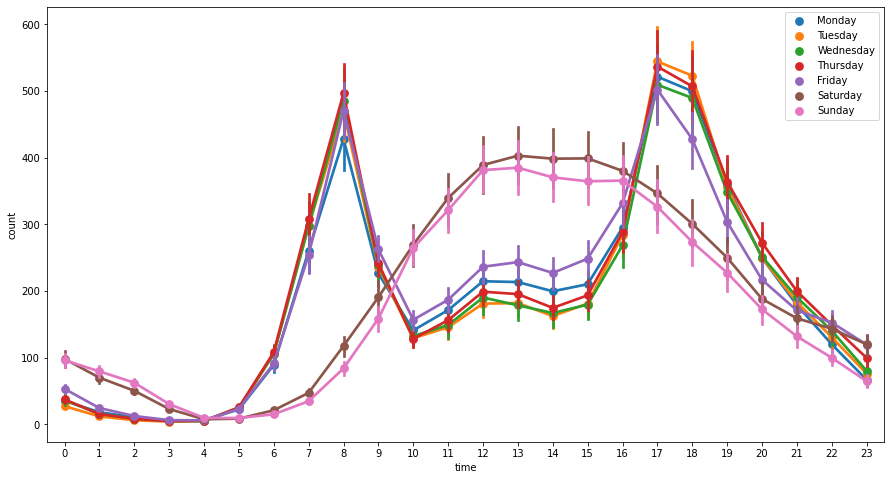

In [24]:
plt.figure(figsize=(15,8))
sns.pointplot(data=train, x='시간', y='count', hue='요일', hue_order=['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.legend()
plt.xlabel('time')
plt.show()

* 시간별로 살펴보면 출, 퇴근시간에 대여량이 가장 많고, 주말에는 이 시간대의 대여량이 떨어지고 낮시간에 많아진다.
* 주중끼리, 주말끼리는 서로 비슷한 양상을보인다.
* workingday에는 역시 출, 퇴근시간 대여량이 가장 많았으며 그렇지 않은 날과 비교적 상반된 양상을 보였다.
* holiday에는 휴일과 아닌 날의 양상이 반대로는 보이지 않았으며 비슷했다. 휴일에도 출근하는 사람이 있는 듯 하다

# mpg


## Load Dataset
seaborn을 이용해 'mpg'데이터셋을 불러와주세요.

In [25]:
mpg = sns.load_dataset('mpg')

In [26]:
mpg.model_year

0      70
1      70
2      70
3      70
4      70
       ..
393    82
394    82
395    82
396    82
397    82
Name: model_year, Length: 398, dtype: int64

## 시각화

model_year과 mpg 데이터 값을 산점도로 보여주고, 그 간의 선형관계를 선으로 보여주세요.
<br> Hint: regplot

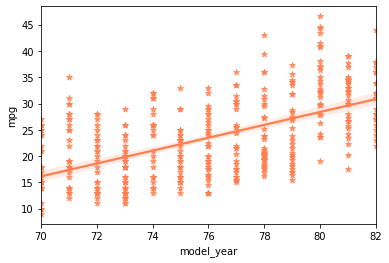

In [27]:
sns.regplot(x='model_year', y = 'mpg', data=mpg,color='coral', marker='*')
plt.show()

너무너무 고생 많으셨습니다!! 시각화 세션 화이팅하세요ㅎㅎㅎ
